In [1]:
# To find ECD Control

import sys 
sys.path.append('C:\\Users\\Eesh Gupta\\Documents\\RU Research\\Chakram')


In [8]:
import numpy as np
from qutip import *
from DECD_paramV2 import FixedBatchOptimizer as BatchOptimizer
import matplotlib.pyplot as plt

In [9]:
from OptimizationAnalysis import OptimizationAnalysis

In [10]:
%load_ext autoreload
%autoreload 2

In [4]:
#Modes Truncation
N1 = 15
N2 = 15

In [5]:
#The target oscillator state.
#Initial oscillator state.
Fock1 = 0
Fock2= 5
psi_i1 = basis(N1,Fock1) #initial state
psi_i2 = basis(N2,Fock2)
initial = tensor(basis(2,0), psi_i1, psi_i2)

#Target
Fock1 = 5
Fock2= 0
psi_t1 = basis(N1,Fock1) #target state
psi_t2 = basis(N2,Fock2)
target = tensor(basis(2, 0), psi_t1, psi_t2)

In [6]:
#Optimization of ECD Circuit parameters (betas, phis, and thetas)
#the optimization options
opt_params = {
    'N_blocks' : 10, #circuit depth
    'N_multistart' : 30, #Batch size (number of circuit optimizations to run in parallel)
    'epochs' : 100, #number of epochs before termination
    'epoch_size' : 30, #number of adam steps per epoch
    'learning_rate' : 0.01, #adam learning rate
    'term_fid' : 0.995, #terminal fidelitiy
    'dfid_stop' : 1e-6, #stop if dfid between two epochs is smaller than this number
    'beta_scale' : 3.0, #maximum |beta| for random initialization
    'gamma_scale' : 3.0, #maximum |gamma| for random initialization
    'N_cav1': N1, #number of levels in mode 1
    'N_cav2': N2, #number of levels in mode 2
    'initial_states' : [initial], #qubit tensor oscillator, start in |g> |0>
    'target_states' : [target], #end in |e> |target>.
    #"initial_params": init_params,
    'name' : 'Data/Fock_test_11_1', #name for printing and saving
    'filename' : None, #if no filename specified, results will be saved in this folder under 'name.h5'
    }


#note: optimizer includes pi pulse in every ECD step. However, final ECD step is implemented 
#in experiment as a displacement since the qubit and oscillator should be disentangled at this point.
#So, we ask the optimizer to end in |e> |target> instead of |g>|target>.

#### Filename for angles to be stored

In [11]:
#create optimization object. 
#initial params will be randomized upon creation
opt = BatchOptimizer(**opt_params)

#print optimization info. 
opt.print_info()

2023-01-16 09:40:46.547274: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-16 09:40:46.559390: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


None
Fixed construct needed matrices called
optimization_type: state transfer
N_multistart: 30
N_blocks: 10
term_fid: 0.995
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 30
epochs: 100
beta_scale: 3.0
gamma_scale: 3.0
alpha1_scale: 1.0
alpha2_scale: 1.0
theta_scale: 3.141592653589793
use_etas: False
use_displacements: False
use_phase: False
name: Data/Fock_test_11_1
comment: 
initial_params: None
N_cav1: 15
N_cav2: 15
filename: Data/Fock_test_11_1.h5

Best circuit parameters found:
betas:         [-0.41788-0.06705j -0.00896-0.02477j  2.18818+1.52178j  2.54334+0.51806j
 -0.83809+1.77462j  0.9403 +0.17922j  0.00691+0.67546j -0.13083+0.22645j
 -0.65229-1.59099j -0.94468-1.10534j]
gammas:         [ 2.46475-1.0299j  -0.19062-0.91427j -2.72177+0.00869j  1.13635+1.32997j
 -1.51926+1.58454j  0.94515-0.44413j  0.3678 -0.04206j -0.97181+0.68522j
 -0.38987-1.07421j -0.40754-1.45034j]
alphas1:        [0.+0.j]
alphas2:        [0.+0.j]
phis (deg):    [   0.      -176.76538   93.8

In [12]:
#run optimizer.
opt.optimize()

Start time: 2023-01-16 09:40:49
 Epoch: 63 / 100 Max Fid: 0.768352 Avg Fid: 0.486695 Max dFid: 0.000382 Avg dFid: 0.000028 Elapsed time: 1:32:34.392323 Remaing time: 0:54:22.1034285
 max dFid: 0.000382
dFid stop: 0.000001


 Optimization stopped on keyboard interrupt
optimization_type: state transfer
N_multistart: 30
N_blocks: 10
term_fid: 0.995
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 30
epochs: 100
beta_scale: 3.0
gamma_scale: 3.0
alpha1_scale: 1.0
alpha2_scale: 1.0
theta_scale: 3.141592653589793
use_etas: False
use_displacements: False
use_phase: False
name: Data/Fock_test_11_1
comment: 
initial_params: None
N_cav1: 15
N_cav2: 15
filename: Data/Fock_test_11_1.h5

Best circuit parameters found:
betas:         [ 7.1874 -4.4788j  -0.36471+0.51817j -2.52283+1.83982j  0.80604+1.80671j
 -0.91746-1.98054j -1.64283-1.48977j -2.00389-1.62326j -1.49518+0.23078j
 -1.6986 -0.09748j -1.22839+1.10989j]
gammas:         [-0.17236+0.4786j  -0.3691 +0.5184j   0.72714-2.73816j

'2023-01-16 09:40:49'

In [13]:
filename = opt.filename
analysis = OptimizationAnalysis(filename)

In [14]:
analysis.print_info()

N_blocks: 10
N_cav1: 15
N_cav2: 15
N_multistart: 30
alpha1_scale: 1.0
alpha2_scale: 1.0
beta_scale: 3.0
comment: 
dfid_stop: 1e-06
elapsed_time_s: 5554.3923234939575
epoch_size: 30
epochs: 100
gamma_scale: 3.0
initial_params: []
learning_rate: 0.01
name: Data/Fock_test_11_1
no_CD_end: False
optimization_type: state transfer
term_fid: 0.995
termination_reason: keyboard_interrupt
theta_scale: 3.141592653589793
use_displacements: False
use_etas: False
use_phase: False
filename: Data/Fock_test_11_1.h5

Best circuit parameters found:
betas:         [ 7.18918-4.47461j -0.36442+0.51841j -2.52415+1.83761j  0.80618+1.8076j
 -0.9201 -1.97809j -1.6436 -1.48873j -2.00495-1.62158j -1.49432+0.23078j
 -1.69903-0.09711j -1.22714+1.11035j]
gammas:         [-0.17241+0.47837j -0.36952+0.51863j  0.72823-2.73752j  2.42322-0.87727j
  1.04243+3.61465j -1.53952+0.45785j -0.70641+1.4964j   0.00059-0.81006j
  0.39308-0.87421j  1.18707-7.07964j]
alphas1:        [0.+0.j]
alphas2:        [0.+0.j]
phis (deg):    [ 

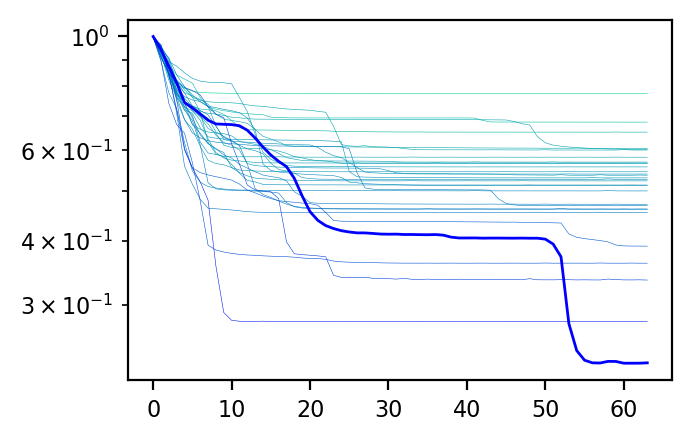

In [15]:
analysis.plot_fidelities()

In [24]:
opt.parameters.items()
for parameter, value in opt.parameters.items():
    print(parameter)
    print(value)
    print('------')

optimization_type
state transfer
------
N_multistart
2
------
N_blocks
2
------
term_fid
0.995
------
dfid_stop
1e-06
------
no_CD_end
False
------
learning_rate
0.01
------
epoch_size
20
------
epochs
10
------
beta_scale
3.0
------
gamma_scale
3.0
------
alpha1_scale
1.0
------
alpha2_scale
1.0
------
theta_scale
3.141592653589793
------
use_etas
False
------
use_displacements
False
------
use_phase
False
------
name
Data/Fock_test_11 
------
comment

------
initial_params
None
------
N_cav1
5
------
N_cav2
5
------


In [13]:
#can print info, including the best circuit found.
opt.print_info() 

optimization_type: state transfer
N_multistart: 2
N_blocks: 2
term_fid: 0.995
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 20
epochs: 10
beta_scale: 3.0
gamma_scale: 3.0
alpha1_scale: 1.0
alpha2_scale: 1.0
theta_scale: 3.141592653589793
use_etas: False
use_displacements: False
use_phase: False
name: ECD_control
comment: 
initial_params: None
N_cav1: 10
N_cav2: 10
filename: ECD_control.h5

Best circuit parameters found:
betas:         [-0.22724-1.50095j  1.28741-0.19488j]
gammas:         [-0.56921+0.42973j  1.12533+1.49402j]
alphas1:        [0.+0.j]
alphas2:        [0.+0.j]
phis (deg):    [ 0.     38.6132]
etas (deg):    [89.99999 89.99999]
thetas (deg):  [-100.4647   100.34767]
Max Fidelity:  0.135336




In [14]:
angles_filename = 'test_opt_angles.txt'
opt.save_angles(filename = angles_filename)

# Get Pulses

In [15]:
from Simulation_Classes_Two_ModeV2 import *
# Classes: ecd_pulse_single_mode to get pulses
#          , qutip_sim_single_mode to simulate on qutip

In [16]:
T1_mode1 = 2e+6 #2ms
T1_mode2 = 2e+6 #2ms

pulse_sim = ecd_pulse_two_mode(param_file = angles_filename,
                              kappa1 = 1/T1_mode1,
                              kappa2 = 1/T1_mode2)

In [17]:
pulse_sim.get_pulses()

---------------------------------------------------
final displacement is 1.5177153032967357


C:\Users\Eesh Gupta\anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


---------------------------------------------------
final displacement is 0.713212847699548
---------------------------------------------------
final displacement is 1.3020713450028283
---------------------------------------------------
final displacement is 1.870419609263129


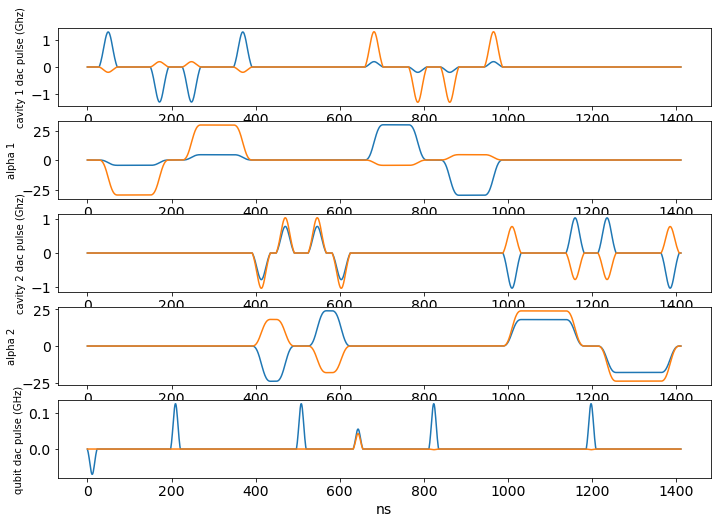

In [18]:
pulse_sim.plot_pulses()

# Qutip Simulation

In [31]:
qutip_sim  = qutip_sim_two_mode(n_q = 2, n_c1 = 10, n_c2 = 10, alpha1 = pulse_sim.alpha1, alpha2 = pulse_sim.alpha2, qubit_pulse = pulse_sim.qubit_dac_pulse_GHz)

In [32]:
# Add various terms 

# to the hamiltonian 
qutip_sim.add_bare_qubit_mode_coupling() # chi/2 adag a sigmaz
qutip_sim.add_mode_mode_coupling()
qutip_sim.add_stark_shift() # chi/2 alpha^2 sigmaz

# to the collapse operators (noise)
qutip_sim.add_qubit_relaxation(T1 = 30e+3) # T1 in nanoseconds
qutip_sim.add_qubit_dephasing(T1 = 30e+3, Techo = 50e+3) # T1, T2 in nanoseconds
qutip_sim.add_cavity_relaxation(T1_mode1 = 2e+6, T1_mode2 = 2e+6) # assumes kappa correction to equation of motion in pulses
qutip_sim.add_cavity_dephasing(T1_mode1 = 2e+6, Techo_mode1 = 3e+6, T1_mode2 = 2e+6, Techo_mode2 = 3e+6) # T1, T2 from photon blockade paper


In [33]:
qutip_sim.me_solve(initial = initial)  #initial state by default is g0

Loaded list object.


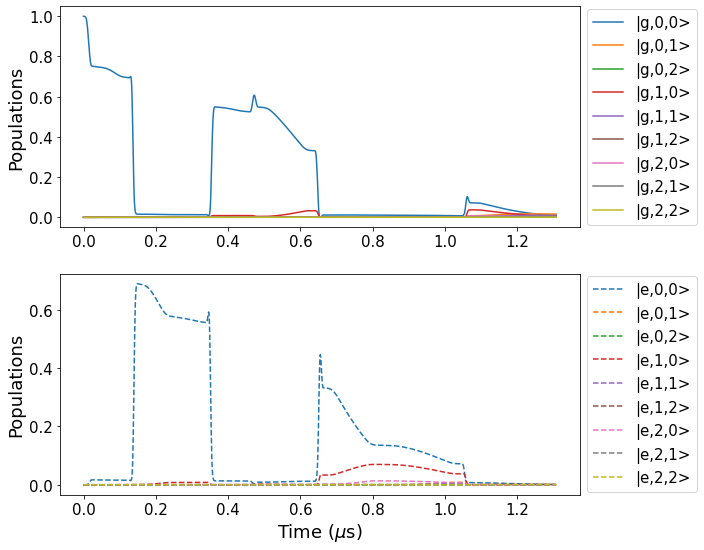

In [34]:
qutip_sim.plot_populations()

In [35]:
qutip_sim.get_fidelity(target)

0.008804368859147663